Inverse of matrix_1 computed successfully.
Inverse of matrix_2 computed successfully.
Inverse of matrix_3 computed successfully.
Inverse of Fisher Matrix 1:
 [[ 4.73658696e-02  2.73721918e-02  2.31742459e-05  1.06213164e-03
  -1.96922772e-01  8.94227725e-08  2.29065172e-06 -1.23562924e-07
   6.17024796e-04]
 [ 2.73721918e-02  1.82920522e-02  2.29668804e-05  8.49031377e-04
  -1.17801617e-01 -1.24622225e-06 -2.11951131e-06  1.19081707e-06
   1.07254045e-03]
 [ 2.31742459e-05  2.29668804e-05  4.86756845e-08  1.43013191e-06
  -1.11835838e-04 -6.06515966e-09 -1.22146802e-08  5.87726666e-09
   3.67679918e-06]
 [ 1.06213164e-03  8.49031377e-04  1.43013191e-06  4.92865159e-05
  -4.79634351e-03 -1.21805942e-07  1.99904830e-06  1.17636375e-07
   8.21238169e-05]
 [-1.96922772e-01 -1.17801617e-01 -1.11835838e-04 -4.79634351e-03
   8.25183026e-01  1.72802485e-06 -3.95294271e-06 -1.52836925e-06
  -3.71564434e-03]
 [ 8.94227725e-08 -1.24622225e-06 -6.06515966e-09 -1.21805942e-07
   1.72802485e-06  8.

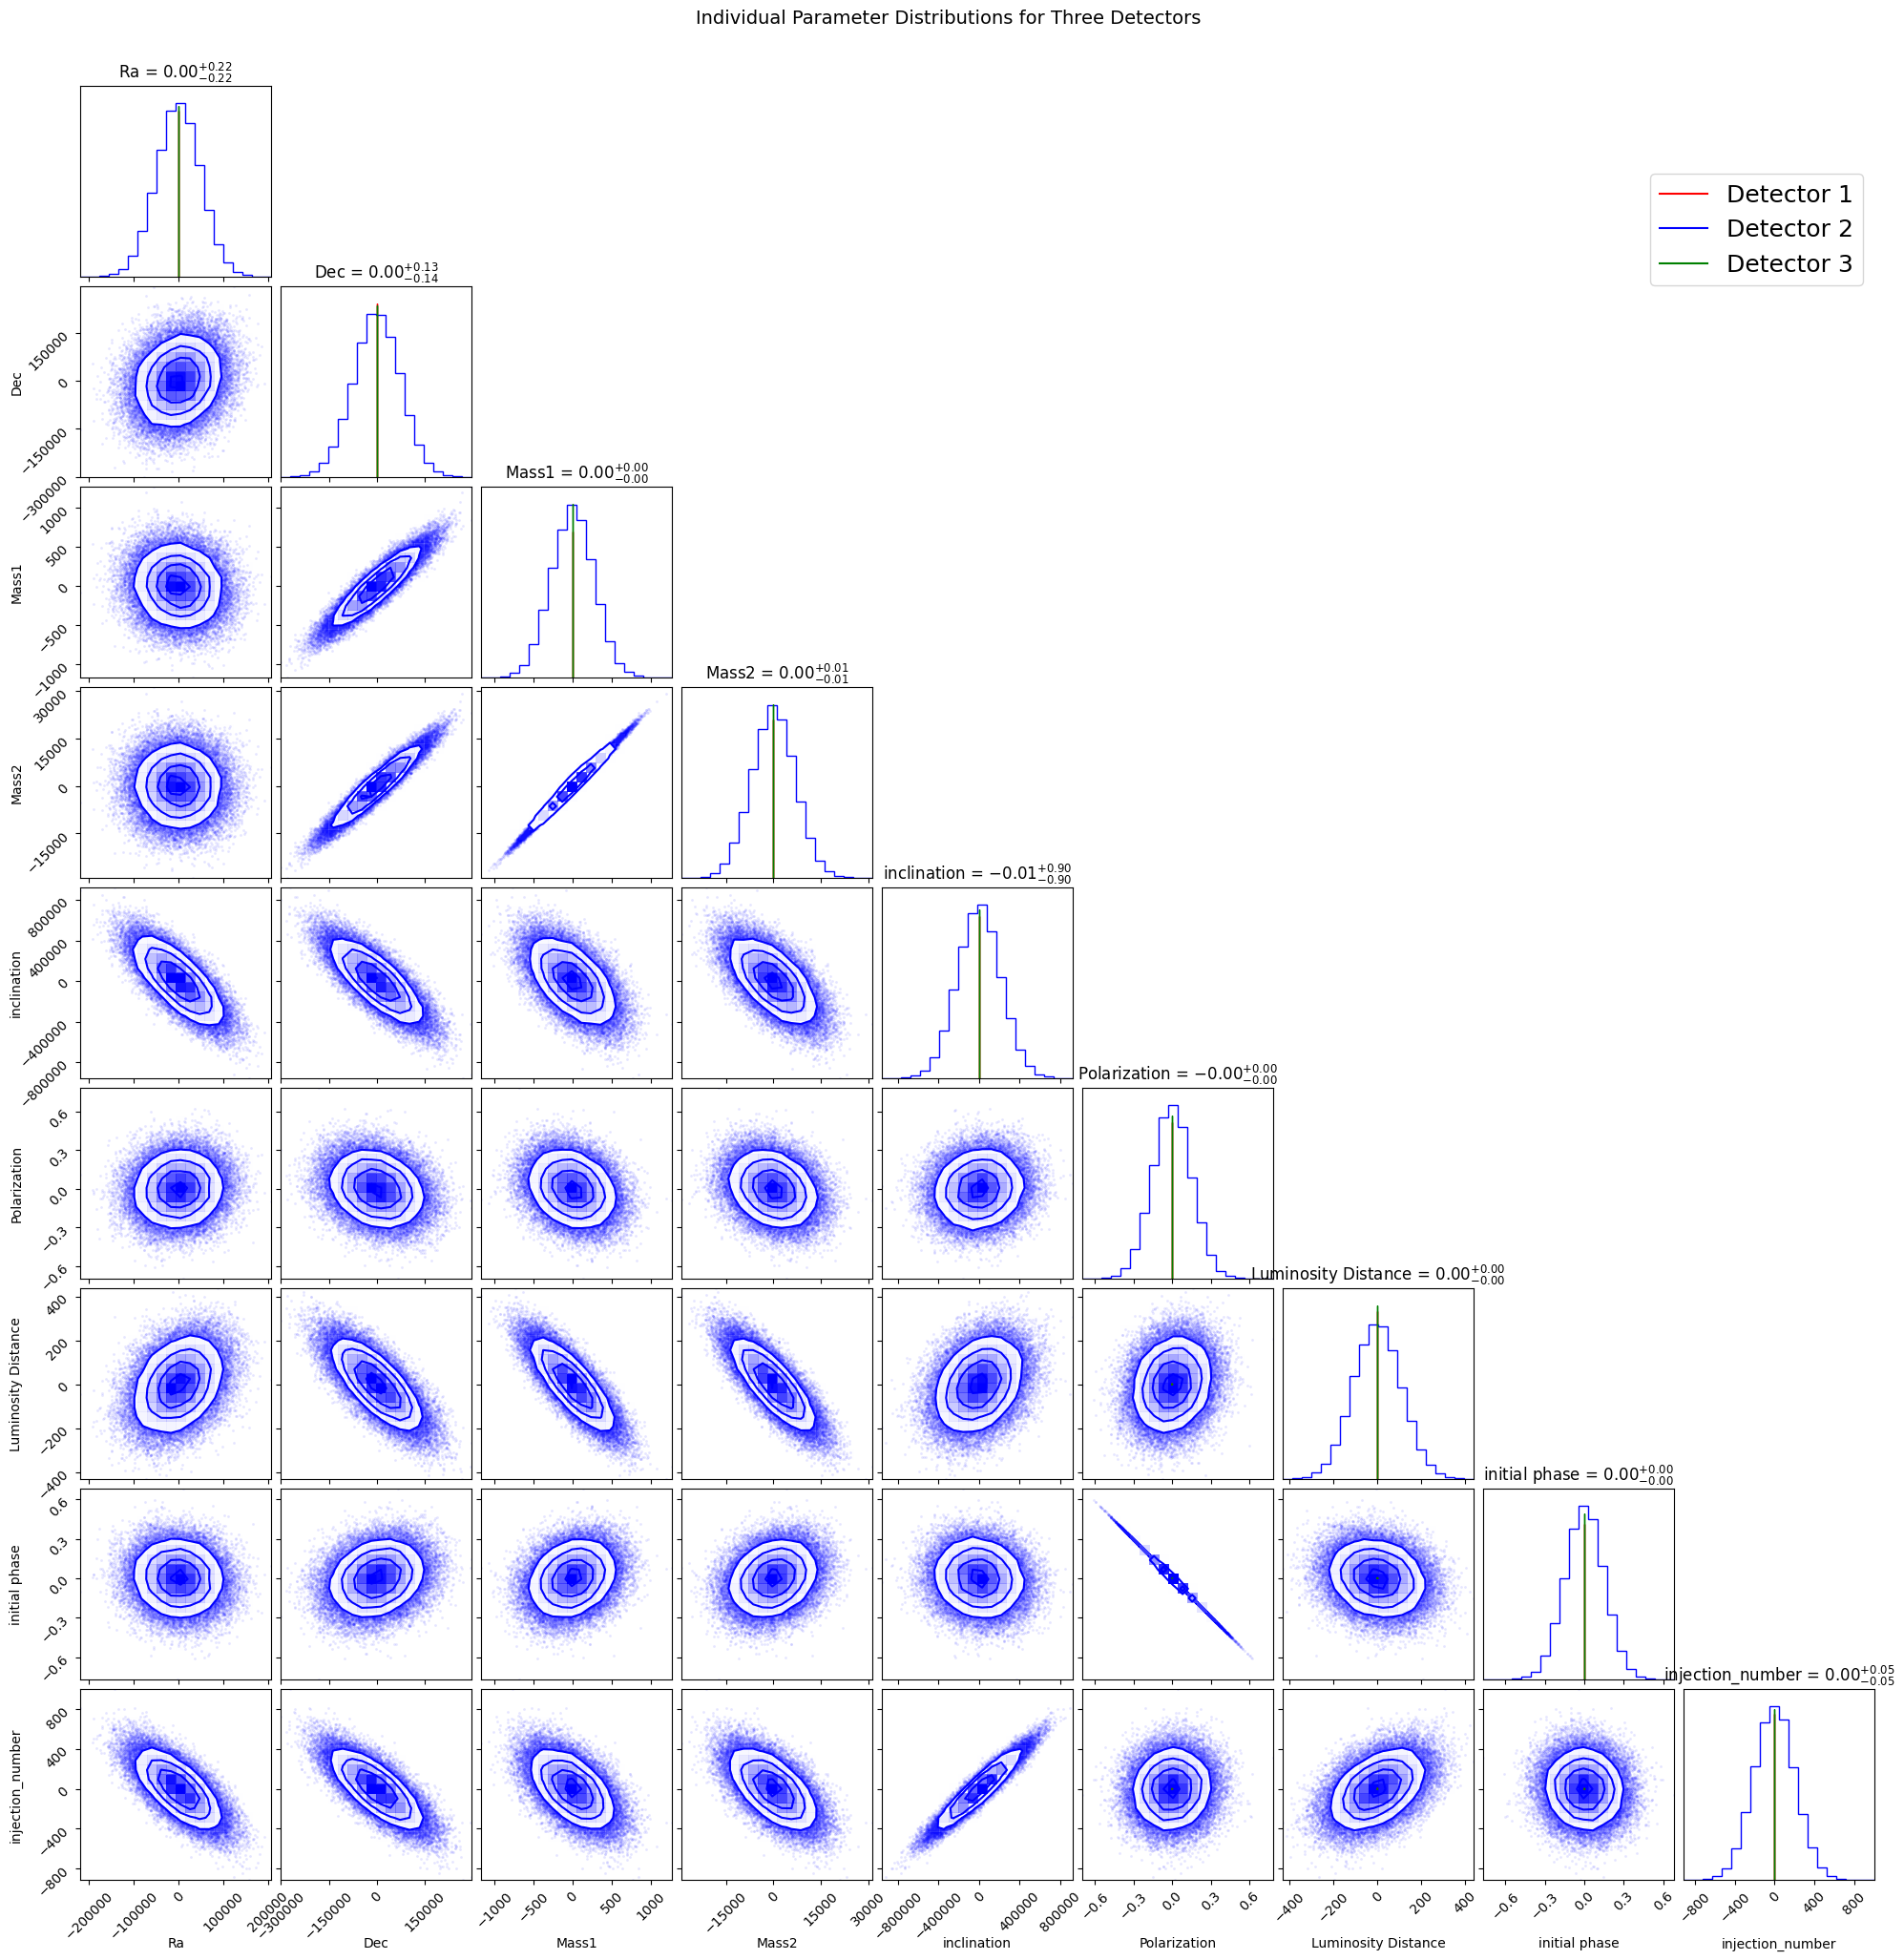

In [3]:
import numpy as np
import pickle
import corner
import matplotlib.pyplot as plt

#加载数据
with open('R_ET_1_ET_2_ET_3_0.pkl', 'rb') as file:
    data = pickle.load(file)

#提取9x9的 Fisher 矩阵
fisher_matrix_1 = data[1]
fisher_matrix_2 = data[2][0]
fisher_matrix_3 = data[2][1]

#直接求出Fisher矩阵的逆
def compute_covariance_directly(fisher_matrix, matrix_name=""):
    try:
        inv_fisher = np.linalg.inv(fisher_matrix)
        print(f"Inverse of {matrix_name} computed successfully.")
    except np.linalg.LinAlgError:
        print(f"Failed to invert {matrix_name}.")
        return None
    return inv_fisher

#确保矩阵是正定的
def ensure_positive_definite(matrix, matrix_name=""):
    eigvals, eigvecs = np.linalg.eigh(matrix)
    eigvals_clipped = np.clip(eigvals, 1e-10, None)
    matrix_pos_def = eigvecs @ np.diag(eigvals_clipped) @ eigvecs.T
    return matrix_pos_def

#计算协方差矩阵并确保正定
cov_matrix_1 = ensure_positive_definite(compute_covariance_directly(fisher_matrix_1, "matrix_1"), "matrix_1")
cov_matrix_2 = ensure_positive_definite(compute_covariance_directly(fisher_matrix_2, "matrix_2"), "matrix_2")
cov_matrix_3 = ensure_positive_definite(compute_covariance_directly(fisher_matrix_3, "matrix_3"), "matrix_3")

#打印 Fisher 矩阵的逆
print("Inverse of Fisher Matrix 1:\n", cov_matrix_1)
print("Inverse of Fisher Matrix 2:\n", cov_matrix_2)
print("Inverse of Fisher Matrix 3:\n", cov_matrix_3)

mean1 = np.zeros(fisher_matrix_1.shape[0])
mean2 = np.zeros(fisher_matrix_2.shape[0])
mean3 = np.zeros(fisher_matrix_3.shape[0])

#从每个探测器的协方差矩阵生成真实的样本点
samples_1 = np.random.multivariate_normal(mean1, cov_matrix_1, size=50000)
samples_2 = np.random.multivariate_normal(mean2, cov_matrix_2, size=50000)
samples_3 = np.random.multivariate_normal(mean3, cov_matrix_3, size=50000)

#输出部分样本数据
print("Samples from Detector 1:\n", samples_1[:5])
print("Samples from Detector 2:\n", samples_2[:5])
print("Samples from Detector 3:\n", samples_3[:5])

#创建一个新的figure，绘制探测器1
figure = corner.corner(samples_1, labels = ["Ra", "Dec", "Mass1", "Mass2", "inclination", "Polarization", 
          "Luminosity Distance", "initial phase", "injection_number"],
                       show_titles=True, title_fmt=".2f", plot_density=True, color="red", alpha=0.5)

#绘制探测器2
corner.corner(samples_2, labels = ["Ra", "Dec", "Mass1", "Mass2", "inclination", "Polarization", 
          "Luminosity Distance", "initial phase", "injection_number"],
              show_titles=True, title_fmt=".2f", plot_density=True, color="blue", alpha=0.5, fig=figure)

#绘制探测器3
corner.corner(samples_3, labels = ["Ra", "Dec", "Mass1", "Mass2", "inclination", "Polarization", 
          "Luminosity Distance", "initial phase", "injection_number"],
              show_titles=True, title_fmt=".2f", plot_density=True, color="green", alpha=0.5, fig=figure)

#添加图例，表示颜色对应的探测器
plt.plot([], [], color="red", label="Detector 1")
plt.plot([], [], color="blue", label="Detector 2")
plt.plot([], [], color="green", label="Detector 3")
plt.legend(loc="upper right", bbox_to_anchor=(1, 9), fontsize=18, markerscale=4)

# 添加标题
plt.suptitle("Individual Parameter Distributions for Three Detectors", y=1.02, fontsize=14)

#显示图像并保存
plt.show()
figure.savefig("Individual Parameter Distributions for Three Detectors.png", dpi=300)